## Input Preprocessing File for Non-Dynamic Simulation Output

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

### Generating the input from MKModel

Mass is conserved. 



<IPython.core.display.Javascript object>


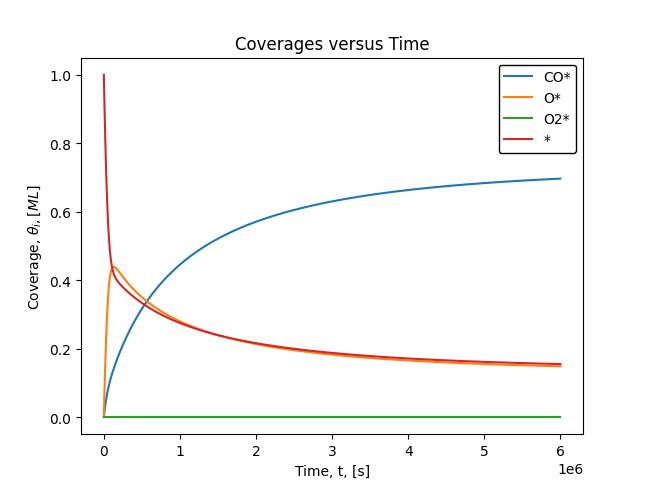

CPU times: user 2.14 s, sys: 19.2 ms, total: 2.16 s
Wall time: 2.16 s


In [2]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
MKM = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') 
MKM.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM.set_limits_of_integration(0,6e6)
MKM.set_rxnconditions(Pr=[1e-6,2e-8,1e-12])
covg,time= MKM.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

<IPython.core.display.Javascript object>


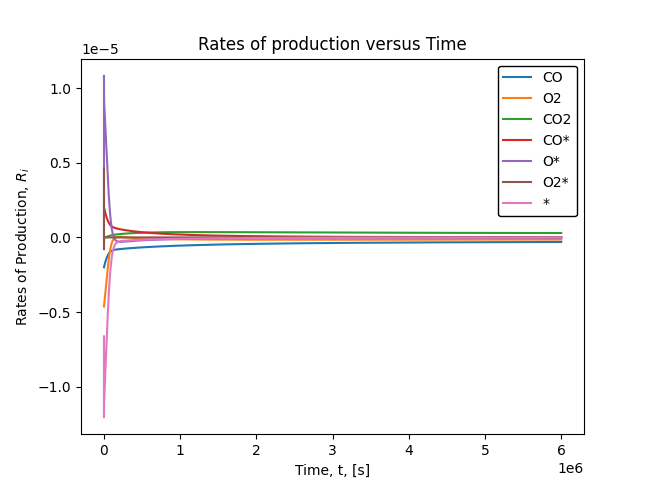

In [3]:
rate_p,r_time = MKM.solve_rate_production(plot=True)

In [4]:
kinetic_info = np.concatenate((time[:, None],covg),axis=1)#, axis=1)
kinetic_info = np.concatenate((kinetic_info,rate_p[:,:len(MKM.Pextract())]),axis=1)#, axis=1)
kinetic_info_df = pd.DataFrame(kinetic_info, columns =['Time', 'CO*', 'O*', 'O2*', '*','R_CO', 'R_O2', 'R_CO2'])

In [5]:
kinetic_info_df

,Time,CO*,O*,O2*,*,R_CO,R_O2,R_CO2
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-2.000000e-06,-4.620000e-06,-5.000000e-10
1,1.760412e-07,3.521705e-13,1.608743e-12,8.832350e-15,1.000000,-2.000000e-06,-4.618984e-06,-5.000000e-10
2,3.520825e-07,7.043410e-13,3.237682e-12,7.564351e-15,1.000000,-2.000000e-06,-4.619130e-06,-5.000000e-10
3,2.112495e-06,4.226046e-12,1.950179e-11,7.533152e-15,1.000000,-2.000000e-06,-4.619134e-06,-5.000000e-10
4,3.872907e-06,7.747751e-12,3.576582e-11,7.535283e-15,1.000000,-2.000000e-06,-4.619133e-06,-5.000000e-10
...,...,...,...,...,...,...,...,...
203,5.524992e+06,6.911902e-01,1.511990e-01,5.065174e-12,0.157611,-3.106253e-07,-1.456671e-07,2.978333e-07
204,5.671642e+06,6.930096e-01,1.502748e-01,5.032041e-12,0.156716,-3.088226e-07,-1.453413e-07,2.967921e-07
205,5.818293e+06,6.947213e-01,1.494057e-01,5.000908e-12,0.155873,-3.071261e-07,-1.450287e-07,2.958046e-07
206,5.964943e+06,6.963325e-01,1.485880e-01,4.971635e-12,0.155079,-3.055284e-07,-1.447292e-07,2.948679e-07


### Converting to csv

In [6]:
kinetic_info_df.to_csv('Sim_NonDynamic_Data_iCovg_iRates.csv',index=False)

In [7]:
kinetic_info_df.head()

,Time,CO*,O*,O2*,*,R_CO,R_O2,R_CO2
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,-0.000002,-0.000005,-5.000000e-10
1,1.760412e-07,3.521705e-13,1.608743e-12,8.832350e-15,1.0,-0.000002,-0.000005,-5.000000e-10
2,3.520825e-07,7.043410e-13,3.237682e-12,7.564351e-15,1.0,-0.000002,-0.000005,-5.000000e-10
3,2.112495e-06,4.226046e-12,1.950179e-11,7.533152e-15,1.0,-0.000002,-0.000005,-5.000000e-10
4,3.872907e-06,7.747751e-12,3.576582e-11,7.535283e-15,1.0,-0.000002,-0.000005,-5.000000e-10


In [8]:
pd.read_csv('Sim_NonDynamic_Data_iCovg_iRates.csv')

,Time,CO*,O*,O2*,*,R_CO,R_O2,R_CO2
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-2.000000e-06,-4.620000e-06,-5.000000e-10
1,1.760412e-07,3.521705e-13,1.608743e-12,8.832350e-15,1.000000,-2.000000e-06,-4.618984e-06,-5.000000e-10
2,3.520825e-07,7.043410e-13,3.237682e-12,7.564351e-15,1.000000,-2.000000e-06,-4.619130e-06,-5.000000e-10
3,2.112495e-06,4.226046e-12,1.950179e-11,7.533152e-15,1.000000,-2.000000e-06,-4.619134e-06,-5.000000e-10
4,3.872907e-06,7.747751e-12,3.576582e-11,7.535283e-15,1.000000,-2.000000e-06,-4.619133e-06,-5.000000e-10
...,...,...,...,...,...,...,...,...
203,5.524992e+06,6.911902e-01,1.511990e-01,5.065174e-12,0.157611,-3.106253e-07,-1.456671e-07,2.978333e-07
204,5.671642e+06,6.930096e-01,1.502748e-01,5.032041e-12,0.156716,-3.088226e-07,-1.453413e-07,2.967921e-07
205,5.818293e+06,6.947213e-01,1.494057e-01,5.000908e-12,0.155873,-3.071261e-07,-1.450287e-07,2.958046e-07
206,5.964943e+06,6.963325e-01,1.485880e-01,4.971635e-12,0.155079,-3.055284e-07,-1.447292e-07,2.948679e-07
